free reward

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pingouin as pg

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif'] 

def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()

%load_ext autoreload
%autoreload 2

import scipy.signal as sg
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
filedir=r'u:\Data\tang232\V1+LM\abetII\Exprt#5_*'
# filedir=r'F:\V1+LM\abetII\Exprt#5_*'
frrwdfiles=glob.glob(filedir+'\[Rr]esult*\[Ss]tage1*\[Dd]ay*\*.csv')
frrwdfiles

['u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\Stage1\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 1 Free Reward - morerwd_ET#11.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\Stage1\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 1 Free Reward - morerwd_ET#12.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\Stage1\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 1 Free Reward - morerwd_ET#21.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\Stage1\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 1 Free Reward - morerwd_ET#22.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\Stage1\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 1 Free Reward - morerwd_ET#32.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\Stage1\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 1 Free Reward - morerwd_ET#33.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\Stage1\\day1\\WINDOWS-PJJ0GDK_Chub

In [4]:
dfls=[]
for f in frrwdfiles:
    infodf=pd.read_csv(f,names=['Name','Value',''],skiprows=np.arange(17,10000*2,1))
    day=int(f.split('\\')[-2][3:])
    et=f.split('_')[-1].split('.')[0]
    
    
    tmpdf=pd.read_csv(f,skiprows=18,header=1)
    
    
    traylightont=tmpdf[(tmpdf.Group_ID==1)
                      &(tmpdf.Item_Name=='Start')
                      ].Evnt_Time.unique()
    trayentryt=tmpdf[(tmpdf.Group_ID>=1)
                    &(tmpdf.Item_Name=='Tray Entered')
                    ].Evnt_Time.unique()
    ls=[]
    for i,t in enumerate(traylightont[:-1]):
        t0,t1=traylightont[i],traylightont[i+1]
        Ttrayentryt=trayentryt[(trayentryt>t0)&(trayentryt<t1)]
        if Ttrayentryt.shape[0]:
            print(i,t0,Ttrayentryt)
            light2entry=min([deltat for deltat in Ttrayentryt-t0])
        else:
            light2entry=np.nan
        ls.append((i,light2entry,))
    perfdf=pd.DataFrame(ls,columns=['trial','light2entry'])
    perfdf['et']=et
    perfdf['day']=day
    dfls.append(perfdf)
stage1df=pd.concat(dfls)
stage1df.head()

0 1.0 [255.351]
3 278.987 [304.379]
5 318.858 [416.364]
6 426.339 [442.707]
7 451.12 [860.292]
8 873.598 [903.742]
9 912.567 [912.652]
10 923.457 [1076.663]
11 1084.393 [1137.928]
12 1143.153 [1368.739]
13 1378.884 [1575.401]
14 1584.737 [1619.446]
15 1629.966 [2491.757]
16 2497.657 [2787.495]
18 2801.33 [2970.39]
0 1.0 [20.695]
1 26.025 [28.825]
2 36.525 [151.531]
3 160.158 [396.605]
4 402.983 [982.768]
6 997.676 [998.809]
7 1010.809 [1011.373]
8 1019.836 [1089.347]
9 1094.377 [1102.875]
10 1108.835 [1173.265]
11 1178.43 [1302.556]
12 1315.007 [1406.164]
13 1413.444 [1688.839]
15 1704.527 [1924.9]
16 1934.172 [1934.391]
17 1941.101 [2067.938]
19 2078.487 [2185.511]
20 2193.106 [2666.016]
21 2672.246 [2675.912]
22 2687.392 [2692.842]
24 2704.922 [3523.153]
25 3528.228 [3528.595]
29 3552.579 [3555.811]
0 1.0 [407.17]
1 412.41 [1023.846]
2 1031.138 [2874.495]
0 1.0 [375.187]
1 382.63 [436.994]
2 444.214 [791.198]
3 796.303 [1556.157]
4 1570.505 [1635.696]
6 1651.281 [1651.635]
7 1659.711

0 1.0 [6.327]
2 22.949 [24.054]
3 34.229 [35.389]
4 46.03 [47.194]
5 58.014 [147.242]
6 152.273 [219.316]
7 227.9 [274.664]
8 282.857 [282.969]
9 287.999 [288.]
11 302.047 [308.954]
12 319.575 [322.19]
15 347.879 [438.309]
16 446.145 [741.543]
17 748.374 [807.115]
18 814.884 [859.925]
19 868.013 [1026.819]
22 1060.09 [1060.835]
23 1068.895 [1165.916]
24 1173.33 [1351.965]
25 1359.361 [1590.373]
26 1596.933 [1601.516]
27 1606.651 [1606.766]
28 1615.666 [1826.441]
29 1832.986 [1837.001]
30 1844.25 [1908.866]
31 1915.936 [1982.869]
32 1990.09 [2746.409]
33 2753.914 [3203.893]
34 3209.507 [3254.367]
35 3261.917 [3308.375]
36 3314.05 [3316.789]
0 1.0 [285.246]
3 313.117 [350.522]
4 361.941 [363.781]
5 375.246 [431.904]
6 449.879 [451.584]
7 464.444 [465.904]
10 494.986 [547.607]
12 566.991 [577.081]
14 596.571 [606.556]
15 615.917 [662.601]
17 681.366 [692.759]
20 717.844 [737.992]
21 746.171 [750.365]
22 758.544 [776.334]
23 785.756 [911.912]
24 920.242 [1042.396]
25 1051.655 [1060.019]
26

0 1.0 [46.618]
1 60.796 [61.42]
2 74.339 [106.157]
3 111.411 [111.412]
5 132.365 [167.636]
7 181.815 [182.284]
8 191.944 [205.594]
10 224.014 [237.44]
11 247.06 [301.847]
12 313.282 [365.072]
13 376.102 [386.522]
14 396.622 [420.902]
15 431.752 [490.727]
16 499.732 [525.602]
19 547.717 [553.367]
20 564.472 [565.067]
21 574.912 [587.597]
22 597.292 [613.202]
23 622.927 [655.277]
24 664.627 [687.512]
25 696.157 [726.435]
26 735.755 [772.29]
27 781.07 [806.925]
28 812.135 [840.675]
30 860.585 [874.305]
31 884.18 [904.74]
32 913.729 [946.785]
33 959.929 [974.954]
34 984.739 [1078.03]
35 1086.705 [1113.889]
36 1122.729 [1133.67]
37 1138.865 [1139.25]
38 1149.169 [1244.441]
39 1254.076 [1268.559]
40 1280.984 [1338.203]
41 1343.398 [1343.932]
42 1355.559 [1390.826]
43 1399.786 [1399.991]
46 1428.614 [1473.301]
47 1481.854 [1533.629]
48 1542.835 [1832.759]
49 1841.775 [1866.753]
50 1876.939 [1916.374]
51 1925.484 [2041.319]
52 2049.677 [2086.807]
53 2095.377 [2167.721]
54 2176.664 [2283.711]
5

1 6.363 [6.778]
3 20.778 [21.133]
4 29.582 [30.038]
6 44.534 [44.889]
7 51.794 [52.029]
9 68.22 [68.619]
10 75.929 [84.123]
11 91.627 [91.889]
12 96.92 [97.393]
13 104.898 [105.176]
14 112.574 [118.299]
15 125.518 [125.749]
18 148.513 [149.318]
19 157.303 [158.318]
20 165.448 [165.651]
21 172.899 [172.998]
22 180.455 [180.658]
24 194.983 [195.323]
25 202.289 [202.583]
26 209.113 [209.328]
27 216.248 [246.32]
28 253.3 [275.721]
29 283.391 [283.937]
30 291.125 [291.267]
31 298.05 [301.97]
32 309.506 [331.499]
33 339.289 [352.154]
34 359.492 [359.844]
35 367.124 [367.253]
36 374.156 [374.194]
41 413.473 [413.498]
46 447.949 [457.948]
47 465.571 [468.174]
48 475.753 [475.879]
50 489.834 [490.039]
51 496.944 [539.685]
52 547.385 [551.393]
53 559.634 [561.638]
54 569.338 [571.46]
56 587.799 [588.109]
58 599.994 [607.129]
59 614.619 [618.889]
60 626.349 [640.453]
61 647.387 [675.812]
62 682.806 [684.764]
63 692.329 [716.499]
64 724.004 [737.257]
65 745.181 [752.84]
66 760.135 [760.46]
67 767.

0 1.0 [6.239]
2 32.735 [32.998]
3 44.73 [47.871]
4 62.364 [62.823]
5 73.344 [74.863]
6 85.361 [86.389]
7 94.955 [97.615]
8 107.699 [107.751]
16 195.121 [199.795]
17 210.271 [210.761]
18 219.451 [220.991]
20 241.576 [241.646]
23 267.824 [270.549]
24 281.819 [281.904]
25 292.634 [293.139]
27 309.719 [310.134]
28 319.424 [320.349]
33 365.624 [366.234]
35 389.129 [390.114]
36 400.573 [403.042]
39 432.657 [432.862]
45 497.185 [498.559]
47 518.094 [518.33]
52 565.705 [574.227]
53 583.694 [584.735]
54 593.989 [594.228]
56 614.278 [616.806]
57 625.416 [625.805]
58 634.726 [636.026]
59 645.511 [658.09]
60 668.805 [688.553]
61 697.243 [728.781]
63 748.054 [768.104]
64 778.159 [779.354]
65 788.658 [799.302]
68 830.578 [830.765]
1 11.78 [11.85]
3 29.449 [29.623]
5 42.468 [42.583]
6 50.703 [51.028]
8 66.033 [66.268]
11 90.318 [90.598]
12 97.847 [98.127]
15 115.097 [121.167]
16 128.312 [129.252]
18 142.233 [142.527]
22 171.0 [171.04]
24 185.7 [185.875]
25 192.855 [192.91]
27 207.435 [207.535]
30 229

,trial,light2entry,et,day
0,0,254.351,ET#11,1
1,1,NaN,ET#11,1
2,2,NaN,ET#11,1
3,3,25.392,ET#11,1
4,4,NaN,ET#11,1


In [5]:
import pingouin as pg

Text(0, 0.5, 'Resp. Ltncy (s)')

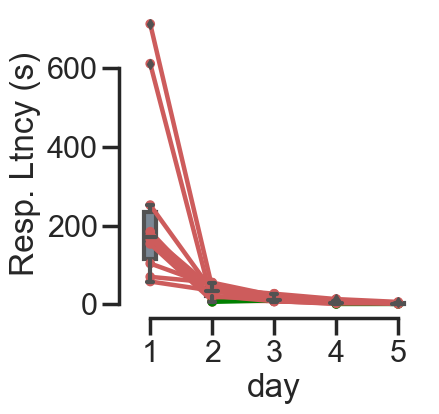

In [6]:
to_plot=stage1df.groupby(['et','day']).light2entry.median().to_frame('ltncy').reset_index()
to_plot.head()
# fig,ax=plt.subplots(1,2,figsize=(10,4))
pg.plot_paired(to_plot, dv='ltncy', within='day', subject='et')
plt.ylabel('Resp. Ltncy (s)')

Text(0, 0.5, 'Perc_touches')

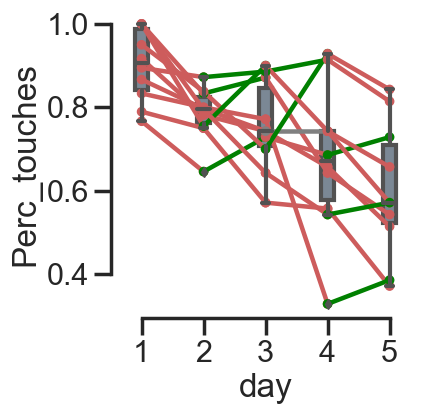

In [8]:
to_plot=stage1df.groupby(['et','day']).apply(lambda x:x.light2entry.count()/x.light2entry.shape[0]
                                            ).to_frame('perc').reset_index()
to_plot.head()
# fig,ax=plt.subplots(1,2,figsize=(10,4))
pg.plot_paired(to_plot, dv='perc', within='day', subject='et')
plt.ylabel('Perc_touches')

Text(0, 0.5, 'n_trials')

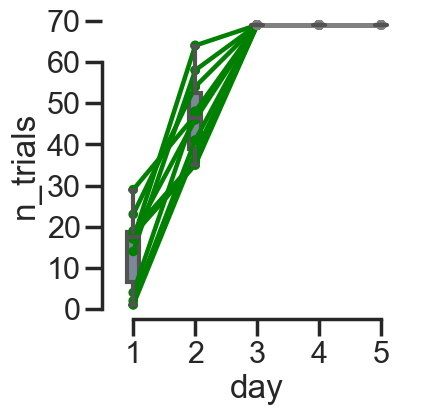

In [9]:
to_plot=stage1df.groupby(['et','day']).trial.max().to_frame('ntrial').reset_index()
to_plot.head()
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax=pg.plot_paired(to_plot, dv='ntrial', within='day', subject='et',ax=ax)
ax.set_yticks(np.arange(0,80,10))
ax.set_yticklabels(np.arange(0,80,10))
plt.ylabel('n_trials')

must touch

In [12]:
filedir=r'u:\Data\tang232\V1+LM\abetII\Exprt#5_*'
frrwdfiles=glob.glob(filedir+'\[Rr]esult*\[Ss]tage2*\[Dd]ay*\*.csv')
frrwdfiles

['u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage2\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#11.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage2\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#12.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage2\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#21.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage2\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#22.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage2\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#32.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage2\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#33.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMAr

In [13]:
dfls=[]
for f in frrwdfiles:
    infodf=pd.read_csv(f,names=['Name','Value',''],skiprows=np.arange(17,10000*2,1))
    day=int(f.split('\\')[-2][3:])
    print(day,f)
    et=f.split('_')[-1].split('.')[0]
    
    
    tmpdf=pd.read_csv(f,skiprows=17,header=0)
    
    graydispt=tmpdf[(tmpdf.Group_ID==3)
               &(tmpdf.Item_Name=='displaygray')
               ].Evnt_Time.unique()
    graytoucht=tmpdf[(tmpdf.Group_ID==6)
                   &(tmpdf.Item_Name=='touch')
                   ].Evnt_Time.unique()
    trayentryt=tmpdf[(tmpdf.Group_ID==12)
                   &(tmpdf.Item_Name=='Reward Tray Entered')
                   ].Evnt_Time.unique()
    ls=[]
    for i,t in enumerate(graydispt[:-1]):
        t0,t1=graydispt[i],graydispt[i+1]
        Tgraytoucht=graytoucht[(graytoucht>t0)&(graytoucht<t1)]
        Ttrayentryt=trayentryt[(trayentryt>t0)&(trayentryt<t1)]
        if Tgraytoucht.shape[0]:
            touch2entry=min([deltat for deltat in Ttrayentryt-Tgraytoucht if deltat>0])
        else:
            touch2entry=np.nan
        ls.append((i,touch2entry,))
    perfdf=pd.DataFrame(ls,columns=['trial','touch2entry'])
    perfdf['et']=et
    perfdf['day']=day
    dfls.append(perfdf)
stage2df=pd.concat(dfls)
stage2df

1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#11.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#12.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#21.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#22.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#32.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#33.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_

7 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day7\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#41.csv
7 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day7\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#42.csv
8 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage2\day8\WINDOWS-PJJ0GDK_ChubykinLab_Stage 2 must touch_oneatatimevideo_v1_ET#11.csv


,trial,touch2entry,et,day
0,0,NaN,ET#11,1
1,1,NaN,ET#11,1
2,2,NaN,ET#11,1
3,3,NaN,ET#11,1
4,4,NaN,ET#11,1
...,...,...,...,...
79,79,NaN,ET#11,8
80,80,NaN,ET#11,8
81,81,NaN,ET#11,8
82,82,NaN,ET#11,8


In [15]:
to_plot=stage2df.groupby(['et','day']).touch2entry.apply(lambda x:(x.shape[0]-x.isna().sum())/x.shape[0]
                                                        ).to_frame('perc').reset_index()
# g=sns.catplot(data=to_plot,x='day',y='perc',row='et',kind='point')
# plt.yticks(np.arange(0,1.2,0.2))
# g.map(plt.axhline, y=0.6, ls='--', c='green')

In [16]:
import pingouin as pg

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.9709009234187059, 0.5326413088101082, 0.6030946551014079)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.9327296378839393, 0.5823904489885355, 0.21492467041616475)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.7374807689165666, 0.6671473110139705, 0.21337889937996618)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor i

<AxesSubplot:xlabel='day', ylabel='perc'>

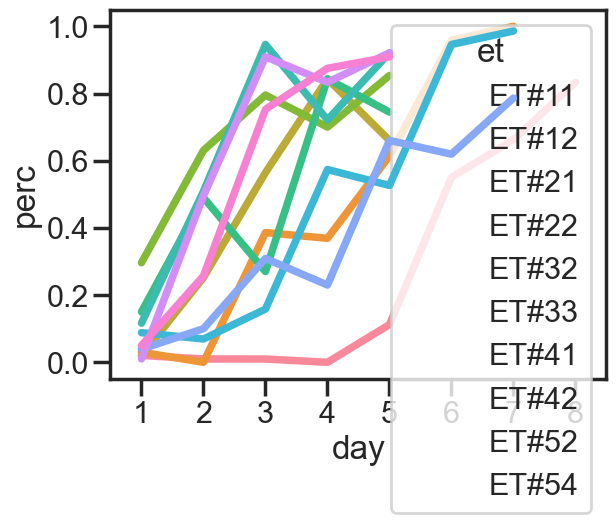

In [17]:
sns.pointplot(data=to_plot,x='day',y='perc'
             ,hue='et'
              ,markers=''
#               ,legend=''
             )
# plt.savefig(report_directory+'\perctouch_stage2_pairedplot.pdf')
# plt.savefig(report_directory+'\perctouch_stage2_pairedplot.png')

# discrimination

In [19]:
filedir=r'u:\Data\tang232\V1+LM\abetII\Exprt#5_*'
frrwdfiles=glob.glob(filedir+'\[Rr]esult*\[Ss]tage3*\[Dd]ay*\*.csv')
frrwdfiles

['u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage3\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#21.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage3\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#22.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage3\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#32.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage3\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#33.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage3\\day2\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#21.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage3\\day2\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimi

In [20]:
dfls=[]
for f in frrwdfiles:
    infodf=pd.read_csv(f,names=['Name','Value',''],skiprows=np.arange(17,10000*2,1))
    day=int(f.split('\\')[-2][3:])
    print(day,f)
    et=f.split('_')[-1].split('.')[0]
    
    tmpdf=pd.read_csv(f,skiprows=17)
    if 'Evnt_Time' not in tmpdf.columns:
        tmpdf=pd.read_csv(f,skiprows=17,header=1)
#     et=f.split('_')[-2]
#     break
    if 'withopto' in f:
        laseront=tmpdf[(tmpdf.Group_ID==3)
                      &(tmpdf.Item_Name=='Laser #1')
                      ].Evnt_Time.values
    dispmov1t=tmpdf[(tmpdf.Group_ID==3)
                   &(tmpdf.Evnt_Name.str.contains('Play Video'))
                   &(tmpdf.Arg2_Name=='Video 1')
                   ].Evnt_Time.values
    dispmov2t=tmpdf[(tmpdf.Group_ID==3)
                    &(tmpdf.Evnt_Name.str.contains('Play Video'))
                    &(tmpdf.Arg2_Name=='Video 2')
                   ].Evnt_Time.values
    mov1cortoucht=tmpdf[(tmpdf.Group_ID==4)
                        &(tmpdf.Item_Name=='loccorrecttouch')
                       ].Evnt_Time.values
    mov2notoucht=tmpdf[(tmpdf.Group_ID==4)
                        &(tmpdf.Item_Name=='corrnotouch')
                       ].Evnt_Time.values
    mov1notoucht=tmpdf[(tmpdf.Group_ID==4)
                        &(tmpdf.Item_Name=='notouch')
                       ].Evnt_Time.values
    mov2inctoucht=tmpdf[(tmpdf.Group_ID==4)
                        &(tmpdf.Item_Name=='locinctouch')
                       ].Evnt_Time.values
    mov2notouchcorrectiont=tmpdf[(tmpdf.Group_ID==4)
                                &(tmpdf.Item_Name=='locinctouchcorrection')
                               ].Evnt_Time.values
    mov1touchcorrectiont=tmpdf[(tmpdf.Group_ID==4)
                              &(tmpdf.Item_Name=='loccorrecttouchcorrection')
                              ].Evnt_Time.values
    trayentryt=tmpdf[(tmpdf.Group_ID==12)
                     &(tmpdf.Evnt_Name.str.contains('On Event'))
                    ].Evnt_Time.values

    onesessionls=[]
    alldispt=sorted(np.hstack([dispmov1t,dispmov2t]))
    CorrT=np.zeros(len(alldispt))
    alldispt.append(tmpdf.Evnt_Time.max())
    for i,t0 in enumerate(alldispt[:-1]):
        t0,t1=alldispt[i],alldispt[i+1]
        if t0 in dispmov1t:
            stim=1
        else:
            stim=2
        if stim==1:
            t_movtoucht=mov1cortoucht[(mov1cortoucht>t0)&(mov1cortoucht<t1)]
            t_movnotoucht=mov1notoucht[(mov1notoucht>t0)&(mov1notoucht<t1)]
            t_movcorrrectiont=mov1touchcorrectiont[(mov1touchcorrectiont>t0)&(mov1touchcorrectiont<t1)]
            t_trayentryt=trayentryt[(trayentryt>t0)&(trayentryt<t1)]
        elif stim==2:
            t_movnotoucht=mov2notoucht[(mov2notoucht>t0)&(mov2notoucht<t1)]
            t_movtoucht=mov2inctoucht[(mov2inctoucht>t0)&(mov2inctoucht<t1)]
            t_movcorrrectiont=mov2notouchcorrectiont[(mov2notouchcorrectiont>t0)&(mov2notouchcorrectiont<t1)]
        if t_movcorrrectiont.shape[0]:
            CorrT[i]=1
        if t_movtoucht.shape[0] or t_movcorrrectiont.shape[0]:
            disp2touch=min(np.hstack([t_movtoucht,t_movcorrrectiont])-t0) 
            if stim==1 and len(t_trayentryt):
                touch2entry=min(t_trayentryt-t_movtoucht)
            else:
                touch2entry=np.nan
        else:
            disp2touch=np.nan
            touch2entry=np.nan
        if t_movnotoucht.shape[0]:
            disp2touch=np.nan
            touch2entry=np.nan
        if 'withopto' in f:
            laseron=laseront[abs(laseront-t0)<3]
    #         print('laser',len(laseron))
            onesessionls.append((i,stim,disp2touch,touch2entry,len(laseron)))
        else:
            onesessionls.append((i,stim,disp2touch,touch2entry,np.nan))
    onesessiondf=pd.DataFrame(onesessionls,columns=['trial','stim','disp2touch','touch2entry','laser'])
    onesessiondf['et']=et
    onesessiondf['day']=day
    onesessiondf['CorrT']=CorrT
    dfls.append(onesessiondf)
allsessiondf=pd.concat(dfls)
allsessiondf.head()

1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage3\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#21.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage3\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#22.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage3\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#32.csv
1 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage3\day1\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#33.csv
2 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage3\day2\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#21.csv
2 u:\Data\tang232\V1+LM\abetII\Exprt#5_GNG_LMArchT\Results\stage3\day2\WINDOWS-PJJ0GDK_ChubykinLab_Stage 3 Pink noise discrimination_oneatatimevideo_v4_ET#22.csv
2 u:\Data\tang232\V1+LM\abet

,trial,stim,disp2touch,touch2entry,laser,et,day,CorrT
0,0,1,6.519,2.258,NaN,ET#21,1,0.0
1,1,1,7.537,3.379,NaN,ET#21,1,0.0
2,2,2,3.351,NaN,NaN,ET#21,1,0.0
3,3,2,2.611,NaN,NaN,ET#21,1,1.0
4,4,2,7.756,NaN,NaN,ET#21,1,1.0


In [21]:
#### percentage of correct touches 
perc_correct=allsessiondf[(allsessiondf.stim.isin([1,2]))
#                           &(allsessiondf.date)
                          &(allsessiondf.CorrT==0)
                          &(allsessiondf.laser!=1)
                         ].groupby(['et','day','stim']
                                  ).apply(lambda x:x.disp2touch.count()/x.disp2touch.shape[0]
                                             ).to_frame('perc_correct').reset_index()
# g=sns.catplot(data=perc_correct[perc_correct.stim.isin([1,2])],x='day',y='perc_correct',hue='stim',row='et',kind='point')
# # g=sns.catplot(data=perc_correct,x='day',y='perc_correct',hue='stim',col='et',kind='point')
# plt.ylim(np.arange(0,1.2))
# plt.yticks(np.arange(0,1.2,0.2))
# g.map(plt.axhline, y=0.6, ls='--', c='green')
# g.map(plt.axhline, y=0.4, ls='--', c='red')
# plt.legend()


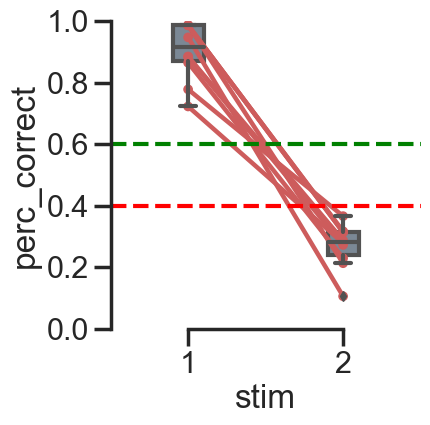

In [22]:
ax=pg.plot_paired(perc_correct.groupby(['et','stim']
                                      ).apply(lambda x: x.loc[x['day'].idxmax()][['day','perc_correct']]).reset_index()
                  , dv='perc_correct', within='stim', subject='et')

plt.axhline( y=0.6, ls='--', c='green')
plt.axhline( y=0.4, ls='--', c='red')
ax.set_yticks(np.arange(0,1.2,0.2))
ax.set_yticklabels(np.arange(0,1.2,0.2).round(1))
ax.set(ylim=(0, 1.0))
sns.despine(ax=ax,trim=True)
# plt.savefig(report_directory+'\perctouch_stage3_pairedplot.pdf')
# plt.savefig(report_directory+'\perctouch_stage3_pairedplot.png')

In [23]:
tmp=perc_correct.groupby(['et','stim']
                    ).apply(lambda x: x.loc[x['day'].idxmax()][['day','perc_correct']]).reset_index()
tmp.groupby('stim').perc_correct.apply(pg.normality)
tmp.groupby('stim').et.nunique()
stat = pg.ttest(tmp[tmp.stim==1].perc_correct,
                tmp[tmp.stim==2].perc_correct,
                paired=False
               )
# stat.to_csv(report_directory+'\perctouch_stage3_pairedplot_stats.csv')

# delayed discrimination

In [27]:
filedir=r'u:\Data\tang232\V1+LM\abetII\Exprt#5_*'
frrwdfiles=glob.glob(filedir+'\[Rr]esult*\[Ss]tage4*\[Dd]ay*\*.csv')
frrwdfiles

['u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage4\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_ET#32.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage4\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_ET#33.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage4\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_ET#52.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage4\\day1\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_ET#54.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage4\\day10\\WINDOWS-PJJ0GDK_ChubykinLab_Stage 4 Pink noise loc discrimination_oneatatimevideo_v6_ET#11.csv',
 'u:\\Data\\tang232\\V1+LM\\abetII\\Exprt#5_GNG_LMArchT\\Results\\stage4\\day10\\WINDOWS-PJJ0GDK_ChubykinLab_Stage

In [28]:
dfls=[]
for f in frrwdfiles:
    infodf=pd.read_csv(f,names=['Name','Value',''],skiprows=np.arange(17,10000*2,1))
    day=int(f.split('\\')[-2][3:])
#     print(day,f)
    et=f.split('_')[-1].split('.')[0]
    
    try:
        tmpdf=pd.read_csv(f,skiprows=17)
        if 'Evnt_Time' not in tmpdf.columns:
            tmpdf=pd.read_csv(f,skiprows=17,header=1)
    except:
        print(f,'not read')
        
    startcorr=tmpdf[(tmpdf.Group_ID==2)
                 &(tmpdf.Item_Name.str.contains('correction'))
                 ].Evnt_Time.values
    if 'withopto' in f:
        laseront=tmpdf[(tmpdf.Group_ID==4)
                      &(tmpdf.Item_Name=='Laser #1')
                      ].Evnt_Time.values
    dispmov1t=tmpdf[(tmpdf.Group_ID==3)
                   &(tmpdf.Evnt_Name.str.contains('Play Video'))
                   &(tmpdf.Arg2_Name=='Video 1')
                   ].Evnt_Time.values
    dispmov2t=tmpdf[(tmpdf.Group_ID==3)
                    &(tmpdf.Evnt_Name.str.contains('Play Video'))
                    &(tmpdf.Arg2_Name=='Video 2')
                   ].Evnt_Time.values
    dispgrayt=tmpdf[(tmpdf.Group_ID==5)
                  &(tmpdf.Item_Name.str.contains('displaygray'))
                   ].Evnt_Time.values
    
    mov1cortoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='loccorrecttouch')
                       ].Evnt_Time.values
    mov2notoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='loccorrnotouch')
                       ].Evnt_Time.values
    mov1notoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='locincnotouch')
                       ].Evnt_Time.values
    mov2inctoucht=tmpdf[(tmpdf.Group_ID==6)
                        &(tmpdf.Item_Name=='locinctouch')
                       ].Evnt_Time.values
    mov2notouchcorrectiont=tmpdf[(tmpdf.Group_ID==6)
                                &(tmpdf.Item_Name=='locinctouchcorrection')
                               ].Evnt_Time.values
    mov1touchcorrectiont=tmpdf[(tmpdf.Group_ID==6)
                              &(tmpdf.Item_Name=='locincnotouchcorrection')
                              ].Evnt_Time.values
    trayentryt=tmpdf[(tmpdf.Group_ID==12)
                     &(tmpdf.Evnt_Name.str.contains('On Event'))
                    ].Evnt_Time.values

    onesessionls=[]
    alldispt=sorted(np.hstack([dispmov1t,dispmov2t]))
    alldispstim=[(i in dispmov1t) for i in alldispt]
    CorrT=np.zeros(len(alldispt)+1)
    alldispt.append(tmpdf.Evnt_Time.max())
    for i,t0 in enumerate(alldispt[:-1]):
        t0,t1=alldispt[i],alldispt[i+1]
#         print(t0,t1)
        if t0 in dispmov1t:
            stim=1
        else:
            stim=2
#         print(stim)
        if stim==1:
#             print('1')
            t_movtoucht=mov1cortoucht[(mov1cortoucht>t0)&(mov1cortoucht<t1)]
            t_movnotoucht=mov1notoucht[(mov1notoucht>t0)&(mov1notoucht<t1)]
            t_movcorrrectiont=mov1touchcorrectiont[(mov1touchcorrectiont>t0)&(mov1touchcorrectiont<t1)]
            t_trayentryt=trayentryt[(trayentryt>t0)&(trayentryt<t1)]  
        elif stim==2:
            t_movnotoucht=mov2notoucht[(mov2notoucht>t0)&(mov2notoucht<t1)]
            t_movtoucht=mov2inctoucht[(mov2inctoucht>t0)&(mov2inctoucht<t1)]
            t_movcorrrectiont=mov2notouchcorrectiont[(mov2notouchcorrectiont>t0)&(mov2notouchcorrectiont<t1)]
#         print(stim,t_movtoucht,t_movnotoucht,t_movcorrrectiont,t_trayentryt)
        if i>=1:
            start_corr_t=startcorr[(startcorr<t0)&(startcorr>alldispt[i-1])]
            if len(start_corr_t)>0:
                CorrT[i]=1
#         if len(t_movcorrrectiont)>0:
#             CorrT[i]=1
# #             print(i,stim,'stim','CorrT')

        if t_movtoucht.shape[0] or t_movcorrrectiont.shape[0]:
            disp2touch=min(np.hstack([t_movtoucht,t_movcorrrectiont])-t0)
            if stim==1 and t_movcorrrectiont.shape[0]>0:
                disp2touch=np.nan
            if stim==1 and len(t_trayentryt):
                touch2entry=min(t_trayentryt-t_movtoucht)
            else:
                touch2entry=np.nan
        else:
            disp2touch=np.nan
            touch2entry=np.nan
        if t_movnotoucht.shape[0]:
            disp2touch=np.nan
            touch2entry=np.nan
        if 'withopto' in f:
            laseron=laseront[abs(laseront-t0)<5+0.5]
    #         print('laser',len(laseron))
            onesessionls.append((i,stim,disp2touch,touch2entry,len(laseron)))
        else:
            onesessionls.append((i,stim,disp2touch,touch2entry,np.nan))
    onesessiondf=pd.DataFrame(onesessionls,columns=['trial','stim','disp2touch','touch2entry','laser'])
    onesessiondf['et']=et
#     onesessiondf['envid']=envid
    onesessiondf['day']=day
    onesessiondf['CorrT']=CorrT[:-1]
    
    corrls=[]
#     for n,g in onesessiondf.groupby(['et','date','stim']):
#     for n,g in onesessiondf.groupby(['envid','date','stim']):
#         tmpseq=g.disp2touch.isna().values
#         corrseq=[0]
#         corrseq.extend([int(tmpseq[i-1]==1) for i,n in enumerate(tmpseq) if i>0])
#         g['CorrT']=corrseq
#         corrls.append(g)
#     onesessiondf=pd.concat(corrls).sort_index()
    dfls.append(onesessiondf)
allsessiondf=pd.concat(dfls)
# allsessiondf.head()

,trial,stim,disp2touch,touch2entry,laser,et,day,CorrT
0,0,1,NaN,NaN,NaN,ET#32,1,0.0
1,1,1,6.277,6.331,NaN,ET#32,1,1.0
2,2,1,NaN,NaN,NaN,ET#32,1,0.0
3,3,1,2.979,2.818,NaN,ET#32,1,1.0
4,4,2,NaN,NaN,NaN,ET#32,1,0.0


In [31]:
#### percentage of correct touches 
allsessiondf['et']=allsessiondf.et.transform(lambda x:x[:5])
perc_correct=allsessiondf[(allsessiondf.stim.isin([1,2]))
#                           &(allsessiondf.date)
                          &(allsessiondf.CorrT==0)
                          &(allsessiondf.laser.isna())
                         ].groupby(['et','day','stim']
                                  ).apply(lambda x:x[x.trial.isin(x.trial.unique()[:40])
                                                    ].disp2touch.count()/x[x.trial.isin(x.trial.unique()[:40])
                                                                          ].disp2touch.shape[0]
                                             ).to_frame('perc_correct').reset_index()
percdf=perc_correct.groupby(['et','day']).apply(lambda x:(x[x.stim==1].perc_correct.values
                                         -x[x.stim==2].perc_correct.values).max()
                                        ).to_frame('perc').reset_index()
percdf=percdf.loc[percdf.reset_index().groupby(['et'])['perc'].idxmax()]

In [49]:
report_directory=r'E:\V1+LM\abetII\report'

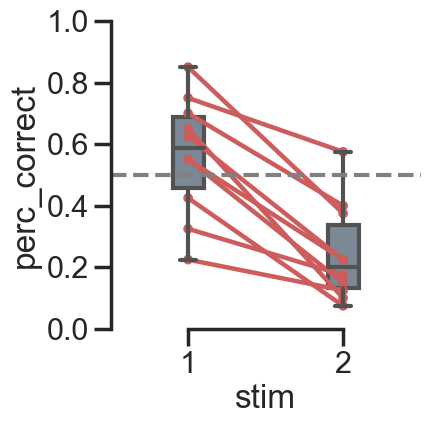

In [32]:
# ax=pg.plot_paired(perc_correct.groupby(['et','stim']
#                                       ).apply(lambda x: x.loc[x['day'].idxmax()][['day','perc_correct']]).reset_index()
#                   , dv='perc_correct', within='stim', subject='et')

ax=pg.plot_paired(perc_correct.groupby(['et','stim']
                    ).apply(lambda x: x[x[['et','day']].apply(tuple, axis=1).isin(bestperf)][['day','perc_correct']]
                           ).reset_index()
                  , dv='perc_correct', within='stim', subject='et')

# plt.axhline( y=0.6, ls='--', c='green')
# plt.axhline( y=0.4, ls='--', c='red')
plt.axhline( y=0.5, ls='--', c='gray')
ax.set_yticks(np.arange(0.0,1.2,0.2))
ax.set_yticklabels(np.arange(0.0,1.2,0.2).round(1))
ax.set(ylim=(0, 1.0))
sns.despine(ax=ax,trim=True)
# plt.show()
# plt.savefig(report_directory+'\perctouch_stage4_pairedplot.pdf')
# plt.savefig(report_directory+'\perctouch_stage4_pairedplot.png')

In [33]:
tmp1=perc_correct.groupby(['et','stim']
                    ).apply(lambda x: x[x[['et','day']].apply(tuple, axis=1).isin(bestperf)][['day','perc_correct']]
                           ).reset_index()
stat = pg.ttest(tmp1[tmp1.stim==1].perc_correct
                 ,tmp1[tmp1.stim==2].perc_correct
                  )
stat


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.064687,18,two-sided,0.000727,"[0.16, 0.49]",1.817783,38.683,0.969922


In [34]:
perc_correct=allsessiondf[(allsessiondf.stim.isin([1,2]))
#                           &(allsessiondf.date)
                          &(allsessiondf.CorrT==0)
                          &(~allsessiondf.laser.isna())
                         ].groupby(['et','day','stim','laser']
                                  ).apply(lambda x:x[x.trial.isin(x.trial.unique()[-40:])
                                                    ].disp2touch.count()/x[x.trial.isin(x.trial.unique()[-40:])
                                                                          ].disp2touch.shape[0]
                                             ).to_frame('perc_touch').reset_index()

In [60]:
# tmp1
report_directory='F:\\V1+LM\\abetII\\report'

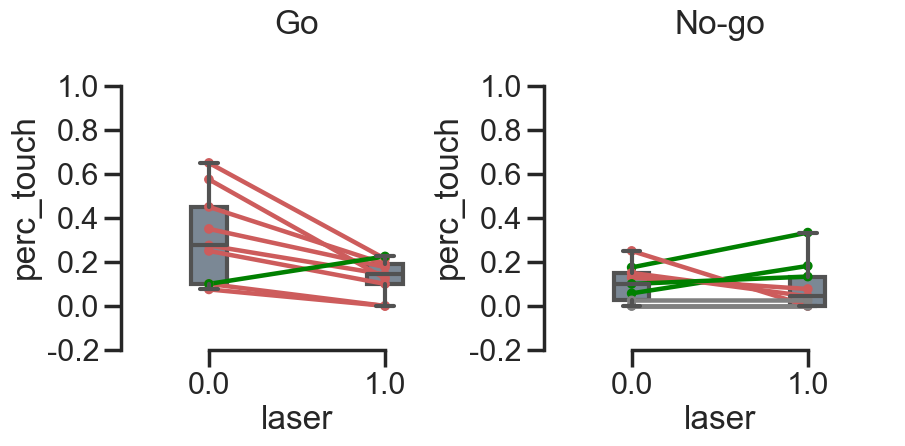

In [40]:
tmp1=perc_correct.groupby(['et','stim','laser']
                        ).apply(lambda x: x.loc[x['day'].idxmax()][['day','perc_touch']]).reset_index()
fig,ax=plt.subplots(1,2,figsize=(10,4))
pg.plot_paired(tmp1[(tmp1.stim==1)&(~tmp1.laser.isna())
                   ]
                  , dv='perc_touch', within='laser', subject='et',ax=ax[0])
pg.plot_paired(tmp1[(tmp1.stim==2)&(~tmp1.laser.isna())
#                     &(tmp1.et.str.contains(et))
                   ]
#                   , dv='perc_correct', within='stim', subject='et'
                  , dv='perc_touch', within='laser', subject='et',ax=ax[1])
ax[0].set_yticks(np.arange(-0.2,1.2,0.2))
ax[0].set_yticklabels(np.arange(-0.2,1.2,0.2).round(1))
ax[0].set_ylim(-0.2,1.2)
ax[1].set_yticks(np.arange(-0.2,1.2,0.2))
ax[1].set_yticklabels(np.arange(-0.2,1.2,0.2).round(1))
ax[1].set_ylim(-0.2,1.2)
ax[0].set_title('Go')
ax[1].set_title('No-go')
# ax.set_xticks(np.arange(0,3,1))
# ax.set_xticklabels(np.arange(0,3,1))
# ax.set_xlim(0,3)
sns.despine(trim=True, ax=ax[0])
sns.despine(trim=True, ax=ax[1])
# plt.title(et)
# plt.show()
# ax.axis('equal')
# plt.savefig(glob.glob(filedir)[0]+'stage4opto40trial.png')
# plt.savefig(glob.glob(filedir)[0]+'stage4opto40trial.pdf')

# plt.savefig(report_directory+'\perctouch_stage4_opto_pairedplot2.pdf')
# plt.savefig(report_directory+'\perctouch_stage4_opto_pairedplot2.png')

In [62]:
# pg.anova(data=tmp1,dv='perc_touch',between=['stim','laser'])
tmp1.groupby(['stim','laser']).perc_touch.apply(pg.normality)

W      pval  normal
stim laser                                  
1    0.0   1 0.0  0.919301  0.386487    True
     1.0   1 1.0  0.888874  0.194274    True
2    0.0   2 0.0  0.941654  0.599411    True
     1.0   2 1.0  0.818192  0.032875   False

In [41]:
stats=[]
for n,g in tmp1.groupby('stim'):
    print(n)
    stat=pg.wilcoxon(g[g.laser==1].perc_touch,g[g.laser==0].perc_touch)
    stat['stim']=n
    stat['nmice']=g.et.nunique()
    stats.append(stat)
stats=pd.concat(stats)
stats
# stats.to_csv(report_directory+'\perctouch_stage4_opto_pairedplot2_stats2.csv')

1
2


C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES,stim,nmice
Wilcoxon,3.0,two-sided,0.019531,-0.866667,0.246914,1,9
Wilcoxon,10.0,two-sided,1.000000,-0.047619,0.438272,2,9
